In [2]:
from google.colab import drive
drive.mount('/content/drive')
root = '/content/drive/MyDrive/Colab Notebooks/PDS'

Mounted at /content/drive


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [6]:
!cp "/content/drive/MyDrive/Colab Notebooks/PDS/diabetes.csv" "./data.csv"

In [20]:
def compare_glucose_statistics(df, sample_size=25, seed=46):
    np.random.seed(seed)
    sample_df = df.sample(n=sample_size, random_state=seed)

    # Population statistics
    pop_mean = df['Glucose'].mean()
    pop_max = df['Glucose'].max()

    sample_mean = sample_df['Glucose'].mean()
    sample_max = sample_df['Glucose'].max()

    print("=== Glucose Comparison ===")
    print(f"Population Mean: {pop_mean:.2f}, Sample Mean: {sample_mean:.2f}")
    print(f"Population Max: {pop_max}, Sample Max: {sample_max}")

    # Plot
    labels = ['Mean Glucose', 'Max Glucose']
    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    ax.bar(x - width/2, [pop_mean, pop_max], width, label='Population', color='skyblue')
    ax.bar(x + width/2, [sample_mean, sample_max], width, label='Sample', color='orange')
    ax.set_title('Glucose: Population vs Sample (n=25)')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.tight_layout()
    plt.show()

In [22]:
def compare_bmi_98th_percentile(df, sample_df):
    pop_bmi_98th = np.percentile(df['BMI'], 98)
    sample_bmi_98th = np.percentile(sample_df['BMI'], 98)

    print("\n=== BMI 98th Percentile Comparison ===")
    print(f"Population 98th Percentile: {pop_bmi_98th:.2f}")
    print(f"Sample 98th Percentile: {sample_bmi_98th:.2f}")

    # Plot
    labels = ['98th Percentile BMI']
    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    ax.bar(x - width/2, [pop_bmi_98th], width, label='Population', color='skyblue')
    ax.bar(x + width/2, [sample_bmi_98th], width, label='Sample', color='orange')
    ax.set_title('BMI 98th Percentile: Population vs Sample (n=25)')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.tight_layout()
    plt.show()


In [23]:
def bootstrap_blood_pressure(df, n_samples=500, sample_size=150, seed=42):
    bp_data = df['BloodPressure'].dropna()
    np.random.seed(seed)

    means, stds, p98s = [], [], []

    for _ in range(n_samples):
        sample = np.random.choice(bp_data, size=sample_size, replace=True)
        means.append(np.mean(sample))
        stds.append(np.std(sample))
        p98s.append(np.percentile(sample, 98))

    boot_mean = np.mean(means)
    boot_std = np.mean(stds)
    boot_p98 = np.mean(p98s)

    pop_mean = bp_data.mean()
    pop_std = bp_data.std()
    pop_p98 = np.percentile(bp_data, 98)

    print("\n=== Blood Pressure Bootstrap Comparison ===")
    print(f"Population Mean: {pop_mean:.2f}, Bootstrap Mean: {boot_mean:.2f}")
    print(f"Population Std: {pop_std:.2f}, Bootstrap Std: {boot_std:.2f}")
    print(f"Population 98th Percentile: {pop_p98:.2f}, Bootstrap 98th: {boot_p98:.2f}")

    # Plot
    labels = ['Mean', 'Std Dev', '98th Percentile']
    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(x - width/2, [pop_mean, pop_std, pop_p98], width, label='Population', color='skyblue')
    ax.bar(x + width/2, [boot_mean, boot_std, boot_p98], width, label='Bootstrap Avg', color='orange')
    ax.set_title('BloodPressure: Bootstrap vs Population')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.tight_layout()
    plt.show()

=== Glucose Comparison ===
Population Mean: 120.89, Sample Mean: 111.12
Population Max: 199, Sample Max: 155


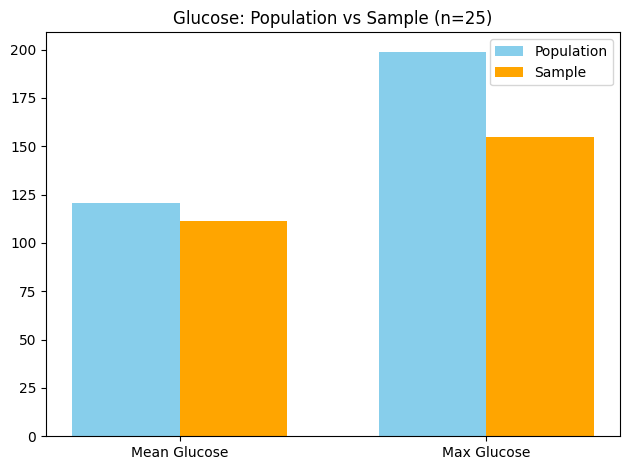


=== BMI 98th Percentile Comparison ===
Population 98th Percentile: 47.53
Sample 98th Percentile: 41.63


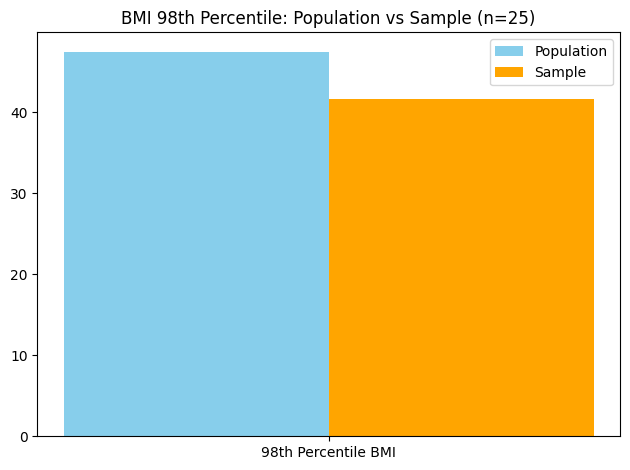


=== Blood Pressure Bootstrap Comparison ===
Population Mean: 69.11, Bootstrap Mean: 69.18
Population Std: 19.36, Bootstrap Std: 19.01
Population 98th Percentile: 99.32, Bootstrap 98th: 97.90


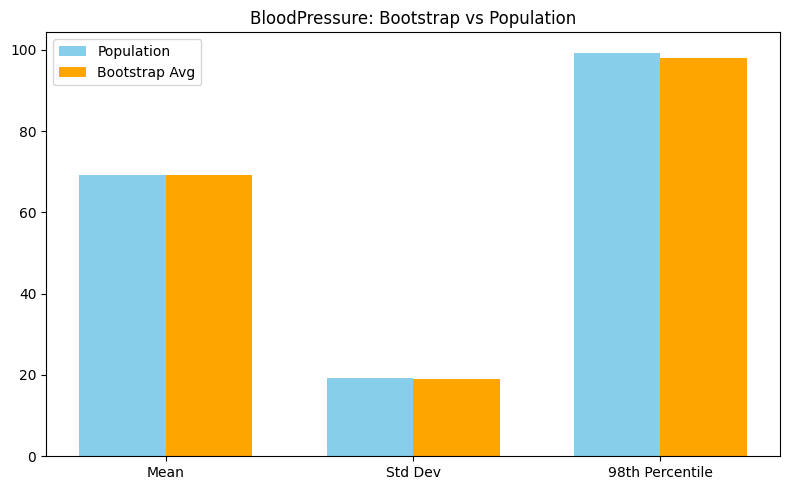

In [24]:

if __name__ == "__main__":
    np.random.seed(46)
    sample_df = df.sample(n=25, random_state=46)

    compare_glucose_statistics(df, sample_size=25, seed=46)
    compare_bmi_98th_percentile(df, sample_df)
    bootstrap_blood_pressure(df, n_samples=500, sample_size=150, seed=42)